# Data Understanding

Tahap Data Understanding bertujuan untuk memahami dataset yang digunakan
dalam penelitian ini, baik dari sisi struktur data, jumlah sampel,
distribusi kelas, maupun karakteristik sinyal time-series.

Pemahaman ini menjadi dasar penting
untuk menentukan metode preprocessing, pemodelan,
dan evaluasi yang tepat.


## 1. Deskripsi Dataset

Dataset yang digunakan pada penelitian ini adalah **DucksAndGeese**,
yang berisi data **time-series satu dimensi** dari sinyal suara burung.

Setiap sampel pada dataset memiliki:
- satu sinyal time-series dengan panjang yang sama
- satu label kelas yang merepresentasikan jenis burung

Dataset ini digunakan untuk tugas **klasifikasi multikelas**
dengan tujuan mengidentifikasi jenis burung
berdasarkan karakteristik sinyal suara.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

!pip -q install sktime

from sktime.datasets import load_from_tsfile_to_dataframe


ModuleNotFoundError: No module named 'google'

## 2. Struktur dan Format Data

Dataset disimpan dalam format `.ts`,
yaitu format standar untuk *time-series classification*
yang umum digunakan pada library `sktime`.

Struktur data setelah dimuat:
- Data fitur (X): kumpulan time-series
- Data label (y): label kelas untuk setiap time-series

Agar data dapat dianalisis dan diproses lebih lanjut,
dataset dikonversi ke dalam bentuk array NumPy.


In [2]:
def load_ts(path):
    X_df, y = load_from_tsfile_to_dataframe(path)
    X = np.array([X_df.iloc[i, 0].values for i in range(len(X_df))], dtype=np.float32)
    return X, y


## 3. Memuat Dataset

Dataset DucksAndGeese disediakan dalam dua bagian,
yaitu data training dan data testing.

Kedua dataset dimuat terlebih dahulu
untuk dianalisis karakteristik dasarnya.


In [3]:
train_path = "/content/drive/MyDrive/MATKUL/PSD/UAS/dataset/DucksAndGeese_TRAIN.ts"
test_path  = "/content/drive/MyDrive/MATKUL/PSD/UAS/dataset/DucksAndGeese_TEST.ts"

X_train_raw, y_train_raw = load_ts(train_path)
X_test_raw,  y_test_raw  = load_ts(test_path)

X_all = np.concatenate([X_train_raw, X_test_raw], axis=0)
y_all = np.concatenate([y_train_raw, y_test_raw], axis=0)

print("X_all:", X_all.shape)
print("y_all:", y_all.shape)
print("Unique labels:", np.unique(y_all))


X_all: (100, 236784)
y_all: (100,)
Unique labels: ['black-bellied_whistling_duck' 'canadian_goose' 'greylag_goose'
 'pink-footed_goose' 'white-faced_whistling_duck']


## 4. Distribusi Kelas

Distribusi kelas dianalisis untuk mengetahui
apakah dataset bersifat seimbang (*balanced*)
atau tidak.

Dataset yang seimbang akan membantu model
belajar secara adil pada setiap kelas
tanpa bias terhadap kelas tertentu.


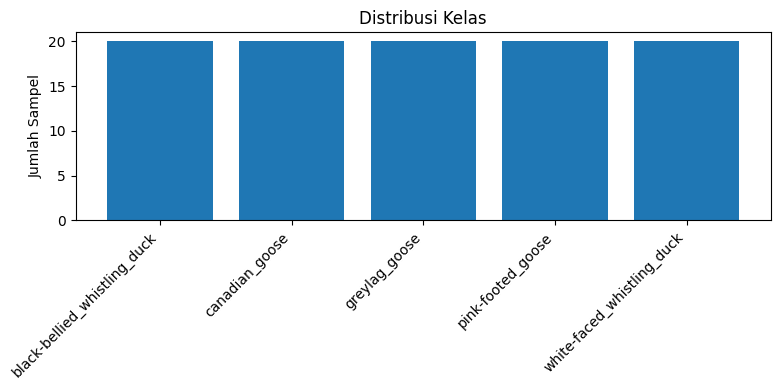

{np.str_('black-bellied_whistling_duck'): np.int64(20), np.str_('canadian_goose'): np.int64(20), np.str_('greylag_goose'): np.int64(20), np.str_('pink-footed_goose'): np.int64(20), np.str_('white-faced_whistling_duck'): np.int64(20)}


In [4]:
labels, counts = np.unique(y_all, return_counts=True)

plt.figure(figsize=(8,4))
plt.bar(labels, counts)
plt.xticks(rotation=45, ha="right")
plt.title("Distribusi Kelas")
plt.ylabel("Jumlah Sampel")
plt.tight_layout()
plt.show()

print(dict(zip(labels, counts)))


Berdasarkan grafik distribusi kelas di atas,
dapat disimpulkan bahwa dataset bersifat **perfectly balanced**,
dengan jumlah sampel yang sama pada setiap kelas.
Kondisi ini ideal untuk klasifikasi multikelas
karena tidak menyebabkan bias prediksi pada kelas tertentu.


## 5. Visualisasi Time-Series

Visualisasi sinyal time-series dilakukan untuk:
- memahami pola umum sinyal suara burung,
- mengamati perbedaan karakteristik antar kelas,
- memastikan tidak terdapat sinyal rusak atau anomali ekstrem.


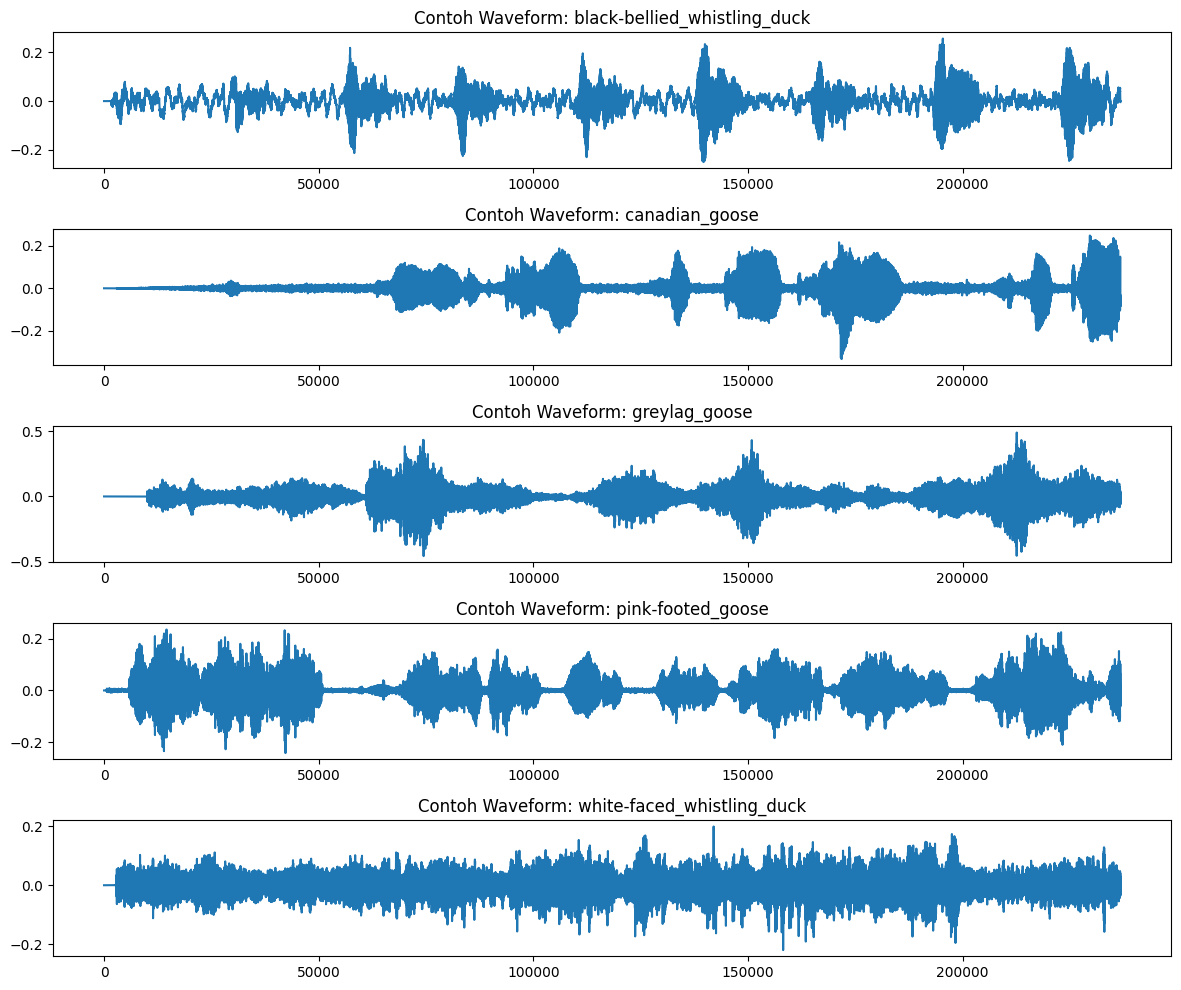

In [6]:
plt.figure(figsize=(12,10))
classes = np.unique(y_all)

for i, cls in enumerate(classes):
    idx = np.where(y_all == cls)[0][0]
    plt.subplot(len(classes), 1, i+1)
    plt.plot(X_all[idx])
    plt.title(f"Contoh Waveform: {cls}")
    plt.tight_layout()

plt.show()



Dari visualisasi time-series dapat diamati bahwa:
- Sinyal memiliki pola yang kompleks dan tidak linear
- Perbedaan antar kelas tidak mudah dipisahkan
  hanya dari domain waktu
- Diperlukan ekstraksi fitur dari domain frekuensi,
  seperti MFCC, pada tahap preprocessing


## 6. Kesimpulan Data Understanding

Kesimpulan tahap Data Understanding adalah sebagai berikut:
1. Dataset terdiri dari 100 sampel time-series satu dimensi
2. Terdapat 5 kelas burung dengan 20 sampel per kelas
3. Distribusi kelas bersifat perfectly balanced
4. Panjang sinyal antar sampel seragam
5. Pola sinyal kompleks sehingga diperlukan ekstraksi fitur lanjutan

Dataset siap dilanjutkan ke tahap **Preprocessing**.
